# HCT Survival Predictions

Goal:  Develop models to improve the prediction of transplant survival rates for patients undergoing allogeneic Hematopoietic Cell Transplantation (HCT) — an important step in ensuring that every patient has a fair chance at a successful outcome, regardless of their background.

Improving survival predictions for allogeneic HCT patients is a vital healthcare challenge. Current predictive models often fall short in addressing disparities related to socioeconomic status, race, and geography. Addressing these gaps is crucial for enhancing patient care, optimizing resource utilization, and rebuilding trust in the healthcare system.

The goal is to address disparities by bridging diverse data sources, refining algorithms, and reducing biases to ensure equitable outcomes for patients across diverse race groups. Your work will help create a more just and effective healthcare environment, ensuring every patient receives the care they deserve.

Dataset Description

The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT), encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. The primary outcome of interest is event-free survival, represented by the variable efs, while the time to event-free survival is captured by the variable efs_time. These two variables together encode the target for a censored time-to-event analysis. The data, which features equal representation across recipient racial categories including White, Asian, African-American, Native American, Pacific Islander, and More than One Race, was synthetically generated using the data generator from synthcity, trained on a large cohort of real CIBMTR data.


    train.csv - the training set, with target efs (Event-free survival)
    test.csv - the test set; your task is to predict the value of efs for this data
    sample_submission.csv - a sample submission file in the correct format with all predictions set to 0.50
    data_dictionary.csv - a list of all features and targets used in dataset and their descriptions


## Import Package

In [1]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

## Import Dataset

In [5]:
path_data_dictionary = "C:/Users/julia/Desktop/Yanjun/hct competition/data_dictionary.csv"
# path_test = "C:/Users/julia/Desktop/Yanjun/hct competition/test.csv"
path_train = "C:/Users/julia/Desktop/Yanjun/hct competition/train.csv"
data_dictionary = pd.read_csv(path_data_dictionary)
# path_submission = "C:/Users/julia/Desktop/Yanjun/hct competition/sample_submission.csv"
# test = pd.read_csv(path_test)
train = pd.read_csv(path_train)
# submission = pd.read_csv(path_submission)

NameError: name 'pd' is not defined

In [ ]:
data_dictionary

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [6]:
train.head(5)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [8]:
# remove Id from train
train = train.drop(columns = 'ID')
import gc
gc.collect()


0

<Axes: >

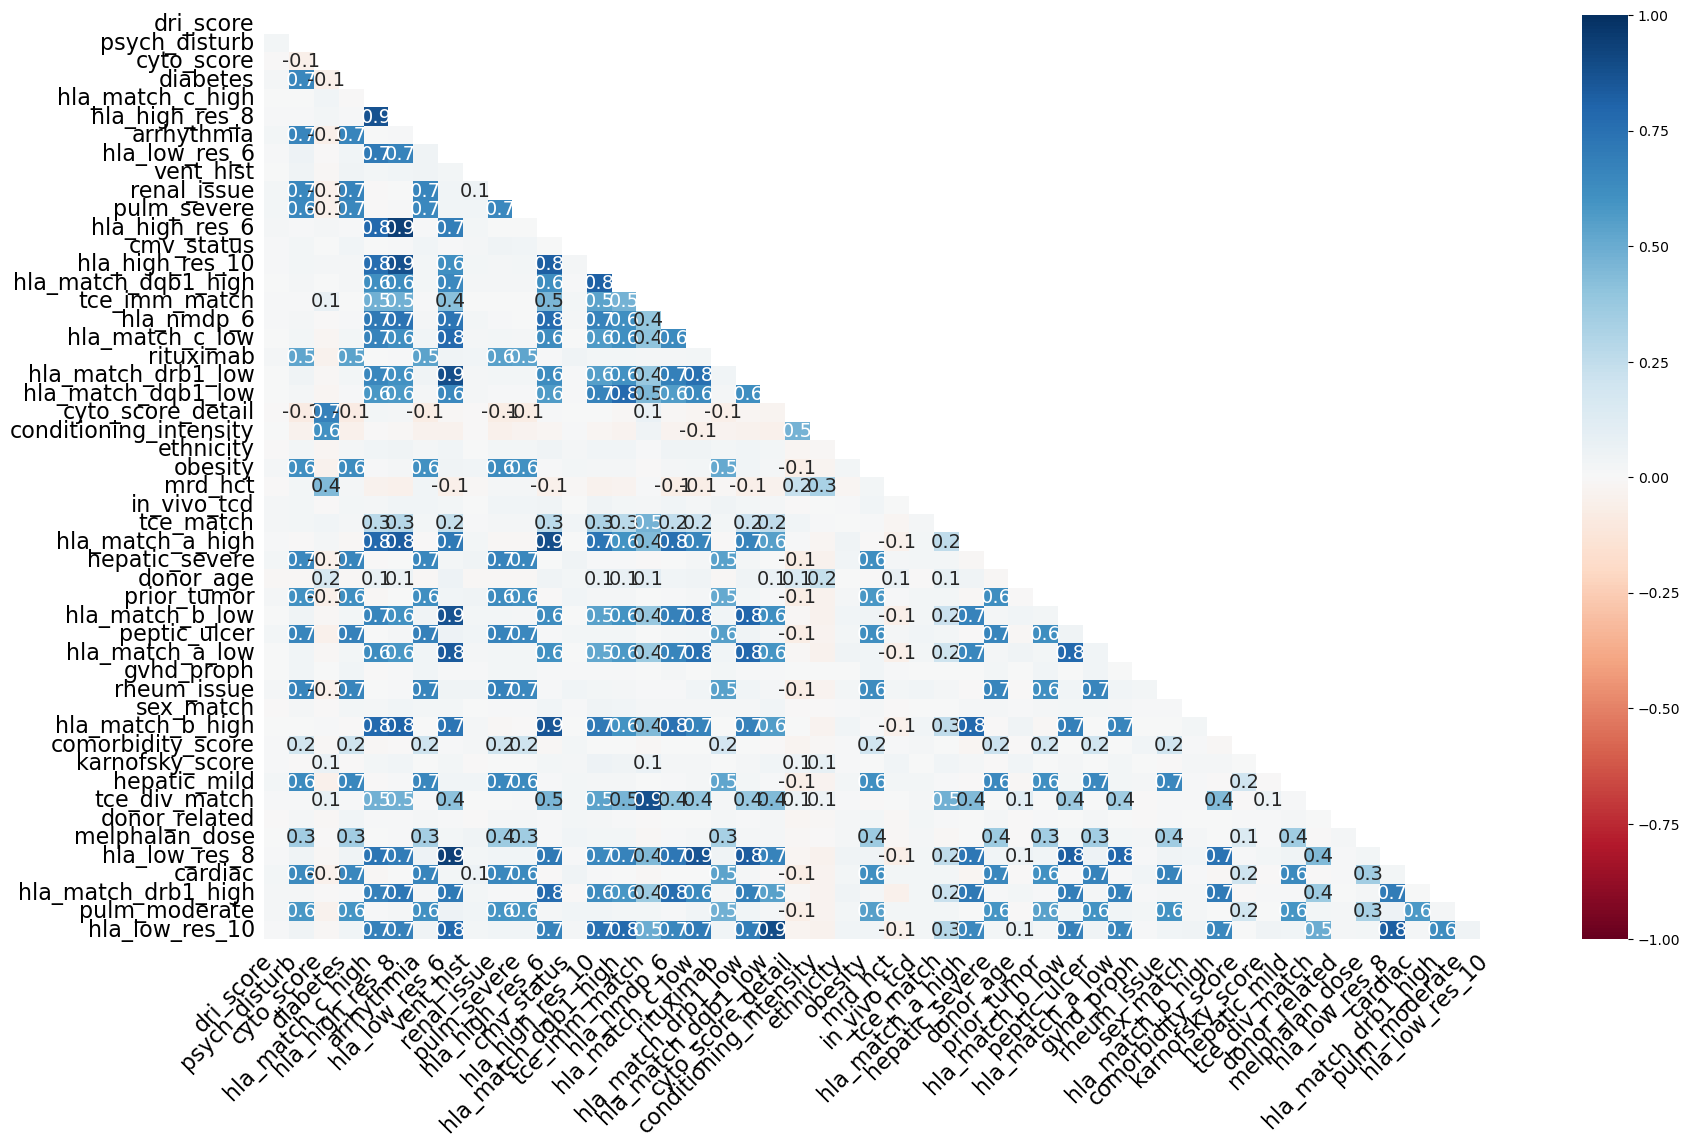

In [ ]:
# check the correlation of missing data
import missingno as msno
msno.heatmap(train)
# from the plot, i can see some missing variables are correlated

### Check the proposition of missing data

In [10]:
missing = np.round(train.isna().sum()/len(train), 3) * 100
df_missing = pd.DataFrame(missing, columns=['values']).sort_values(by = 'values', ascending = True)
# mark different variables which has different category of missing data percentage:

# function to differentiate different category percentage of missing data
def color_map(percent):
  cmap = []
  for x in percent:
    if x >= 20:
      temp = 'background-color: red'
    elif x >= 5:
      temp = 'background-color: orange'
    elif x >= 1:
      temp = 'background-color: yellow'
    else:
      temp = 'background-color: green'
    cmap.append(temp)
  return cmap
# df_missing.style.map(color_map)
df_missing.style.apply(lambda x: color_map(df_missing['values']), axis = 0)

,values
efs_time,0.000000
race_group,0.000000
age_at_hct,0.000000
efs,0.000000
year_hct,0.000000
tbi_status,0.000000
prod_type,0.000000
prim_disease_hct,0.000000
graft_type,0.000000
donor_related,0.500000


In [11]:
del missing, df_missing
gc.collect()

28

# Remove the missing data from  train and assence the importance of variables using randomforestsurvival

### First , Use clean data to find the important variables

In [11]:
# clean_data = train.copy()
# clean_data = clean_data.dropna()
# len(clean_data)

In [6]:
from sksurv.ensemble import RandomSurvivalForest
# use clean data find variables importance

# # change category variable to numerical variables in clean data
# clean_data = pd.get_dummies(data = clean_data, drop_first= True, dtype = int)
# # first baance the clean_data
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy = 'auto', random_state = 1)
# cond = clean_data.columns == 'efs'
# X_cond = clean_data.columns[~cond]
# X, y = smote.fit_resample(clean_data[X_cond], clean_data['efs'])


In [ ]:
# new_clean = pd.concat([X, y], axis = 1)
# del X, y, clean_data, cond, smote
# gc.collect()

In [7]:
from sksurv.util import Surv
# use this new clean dataset to get the important variables 
# rsf = RandomSurvivalForest(n_estimators= 30, max_depth= 20, max_features= 'sqrt', random_state= 1)
# y = new_clean[['efs', 'efs_time']]
# Y = Surv.from_dataframe('efs', 'efs_time', y)
# cond = new_clean.columns.isin(['efs', 'efs_time'])
# X = new_clean[new_clean.columns[~cond]]

In [ ]:
# del new_clean
# gc.collect()

In [ ]:
# rsf.fit(X, Y)
# rsf.score(X, Y)

In [17]:
# use permutation importance to calculate importance of features
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance
# create a dataframe of feature importance
# def C_score(estimator, X, y):
#   y_pred = estimator.predict(X)
#   return concordance_index_censored(Y['efs'], Y['efs_time'], y_pred)[0]
  
# feature_importance = permutation_importance(rsf, X = X, y = Y, scoring = C_score, n_repeats = 3, random_state = 1)
# feature_importance 

In [ ]:
# mean_importance = feature_importance.importances_mean.mean()
# index = np.where(feature_importance.importances_mean >= mean_importance)
# import_variables_1 = X.columns[index]
# import_variables_1

In [ ]:
# use these variables to fit the randomforestsurvival on original dataset, before doing this, clean old dataset, like X, Y, y
# del X, Y, y, index, feature_importance, mean_importance
# gc.collect()


#### The first methods to find important variables is based on clean data, it is biased, so it need full data to use randomforestsurvival to find the important variables

### Second , use full data (smaples ) and randomforestsurvival to find the important variables

In [12]:
# balance full orginal data


from sklearn.utils import resample
y_counts = train.efs.value_counts()
minority = y_counts.index[np.where(y_counts != y_counts.max())].values[0]

new = resample(train[train.efs == minority], replace = True, n_samples = (y_counts.max() - y_counts).max(), random_state = 1).reset_index(drop = True)
train = pd.concat([train, new], axis = 0)
train = train.reset_index(drop = True)
train['efs'].value_counts()

efs
0.0    15532
1.0    15532
Name: count, dtype: int64

In [ ]:
del y_counts, minority, new
gc.collect()

0

In [17]:
train1 = train.copy()

In [2]:
# change category variables to numerical variables
train1 = pd.get_dummies(train1, drop_first= True, dtype = float)

NameError: name 'pd' is not defined

In [21]:
from sksurv.ensemble import RandomSurvivalForest
# define randomforestsurvival
randomsurvival = RandomSurvivalForest(n_estimators= 30, random_state= 1, max_features= 'sqrt')

from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

# use small sample from train1 to calculate the important variables
small_train1 = train1.sample(frac= 0.1, random_state = 1)
cond = train1.columns.isin(['efs', 'efs_time'])
small_X = small_train1[small_train1.columns[~cond]]
small_y = train1.loc[small_X.index, ['efs', 'efs_time']]
small_y = Surv.from_dataframe('efs', 'efs_time',small_y )
trainydataframe = train1[['efs','efs_time']]
trainydataframe = Surv.from_dataframe('efs', 'efs_time', trainydataframe)
randomsurvival.fit(train1[train1.columns[~cond]],trainydataframe)


ValueError: could not convert string to float: 'N/A - non-malignant indication'

In [26]:
# importance_feature = permutation_importance(estimator= randomsurvival, X = small_X, y = small_y,random_state= 1 , n_repeats = 3)

### Third, combine these two methods to impute important missing variables

In [60]:
# mean_ = importance_feature.importances_mean.mean()
# cond = importance_feature.importances_mean > mean_ * 0.3
# important_variables_2 = small_X.columns[np.where(cond)]

In [8]:
# important_variables_2
important_variables_2 = ['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6',
       'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6',
       'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low',
       'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low',
       'age_at_hct', 'hla_match_a_low', 'hla_match_b_high',
       'comorbidity_score', 'karnofsky_score', 'hla_low_res_8',
       'hla_match_drb1_high', 'hla_low_res_10', 'dri_score_Intermediate',
       'dri_score_Low', 'dri_score_N/A - non-malignant indication',
       'dri_score_N/A - pediatric', 'dri_score_TBD cytogenetics',
       'psych_disturb_Yes', 'cyto_score_Intermediate', 'cyto_score_Poor',
       'cyto_score_TBD', 'diabetes_Yes', 'tbi_status_TBI + Cy +- Other',
       'tbi_status_TBI +- Other, <=cGy', 'arrhythmia_Yes',
       'graft_type_Peripheral blood', 'pulm_severe_Yes',
       'prim_disease_hct_ALL', 'prim_disease_hct_AML', 'prim_disease_hct_IEA',
       'prim_disease_hct_IIS', 'prim_disease_hct_MDS', 'prim_disease_hct_NHL',
       'cmv_status_+/-', 'cmv_status_-/+', 'cmv_status_-/-',
       'tce_imm_match_G/G', 'tce_imm_match_P/P', 'prod_type_PB',
       'cyto_score_detail_Intermediate', 'cyto_score_detail_Poor',
       'cyto_score_detail_TBD', 'conditioning_intensity_NMA',
       'conditioning_intensity_RIC', 'ethnicity_Not Hispanic or Latino',
       'in_vivo_tcd_Yes', 'tce_match_Permissive', 'hepatic_severe_Yes',
       'prior_tumor_Yes', 'gvhd_proph_Cyclophosphamide +- others',
       'gvhd_proph_Cyclophosphamide alone', 'gvhd_proph_FK+ MMF +- others',
       'gvhd_proph_FK+ MTX +- others(not MMF)', 'sex_match_F-M',
       'sex_match_M-F', 'sex_match_M-M', 'race_group_Asian',
       'race_group_Black or African-American', 'race_group_More than one race',
       'race_group_White', 'tce_div_match_Permissive mismatched',
       'donor_related_Related', 'donor_related_Unrelated',
       'melphalan_dose_N/A, Mel not given', 'cardiac_Yes',
       'pulm_moderate_Yes']

In [27]:
# use important_variables_2 to fit randomforestsurvival, but first impute the missing data in these variables
import_variables_X = train1[important_variables_2]
_Y = train1[['efs', 'efs_time']]

In [28]:
# del train1, importance_feature, small_train1, small_X, small_y, randomsurvival, important_variables_2, common_variables_
del train1
gc.collect()

14

In [29]:
# use MICE to impute missing data in new important variables2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import HistGradientBoostingRegressor
imputer = IterativeImputer(estimator = HistGradientBoostingRegressor(), max_iter= 40, random_state= 1)
imputed_X = imputer.fit_transform(import_variables_X)
imputed_X_dataframe = pd.DataFrame(imputed_X, columns= import_variables_X.columns)

c:\Users\julia\miniconda3\envs\pythontest2\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
# split the data into train and test
from sklearn.model_selection import train_test_split


# train_X, test_X, train_Y, test_Y = train_test_split(imputed_X_dataframe, _Y, test_size= 0.3, shuffle= True, stratify= _Y['efs'] , random_state= 1)

In [32]:
randomforest = RandomSurvivalForest(n_estimators = 30, max_depth = 12, max_features= 'sqrt', random_state= 1)
train_Y = Surv.from_dataframe('efs','efs_time', train_Y)
randomforest.fit(train_X, train_Y)
randomforest.score(train_X, train_Y)

0.7610919866685553

In [33]:
test_Y = Surv.from_dataframe('efs', 'efs_time', test_Y)
randomforest.score(test_X, test_Y)

0.6779888157481307

In [34]:
del train_X, train_Y, test_X, test_Y, randomforest, imputed_X_dataframe
gc.collect()

82

### Use KNN to impute missing data 

In [13]:
train2 = train.copy()
# balance the data
y_counts = train2.efs.value_counts()
minority = y_counts.index[np.where(y_counts != y_counts.max())].values[0]

new = resample(train2[train2.efs == minority], replace = True, n_samples = (y_counts.max() - y_counts).max(), random_state = 1).reset_index(drop = True)
train2 = pd.concat([train2, new], axis = 0)
train2 = train2.reset_index(drop = True)
train2['efs'].value_counts()
train2 = pd.get_dummies(train2, drop_first= True, dtype = int)


In [14]:
del y_counts, new , minority
gc.collect()

169

In [58]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing  import  StandardScaler
train2_X = train2[important_variables_2]
train2_X = train2_X.astype(float)
scaler = StandardScaler()
train2_X.loc[:,:] = scaler.fit_transform(train2_X.loc[:,:])
# use knn to impute missing data
imputer = KNNImputer(n_neighbors =  5)
x = imputer.fit_transform(train2_X)
train2_X = pd.DataFrame(x, columns= train2_X.columns)
train2_X

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,race_group_Asian,race_group_Black or African-American,race_group_More than one race,race_group_White,tce_div_match_Permissive mismatched,donor_related_Related,donor_related_Unrelated,"melphalan_dose_N/A, Mel not given",cardiac_Yes,pulm_moderate_Yes
0,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,0.530864,...,-0.449578,-0.445173,2.206806,-0.445225,-0.901256,-1.137349,1.179099,0.657555,-0.23126,-0.468239
1,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,0.530864,...,2.224307,-0.445173,-0.453144,-0.445225,1.109562,0.879238,-0.848105,0.657555,-0.23126,2.135660
2,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,0.530864,...,-0.449578,-0.445173,2.206806,-0.445225,1.109562,0.879238,-0.848105,0.657555,-0.23126,-0.468239
3,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,0.530864,...,-0.449578,-0.445173,-0.453144,2.246053,1.109562,-1.137349,1.179099,0.657555,-0.23126,-0.468239
4,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,-0.131168,0.557538,0.634073,0.530864,...,-0.449578,-0.445173,-0.453144,-0.445225,1.109562,0.879238,-0.848105,-1.520785,-0.23126,-0.468239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31059,0.547194,0.079744,-0.943148,-0.089306,0.202072,0.588916,-0.131168,0.557538,-1.577105,0.530864,...,-0.449578,-0.445173,-0.453144,-0.445225,-0.901256,-1.137349,1.179099,-1.520785,-0.23126,-0.468239
31060,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,0.530864,...,-0.449578,-0.445173,2.206806,-0.445225,-0.901256,-1.137349,1.179099,0.657555,-0.23126,-0.468239
31061,-1.764570,-1.837669,-1.770192,-1.737316,-1.895938,0.588916,-1.792111,-1.736362,-1.577105,-1.805483,...,-0.449578,-0.445173,-0.453144,2.246053,-0.901256,0.879238,-0.848105,0.657555,-0.23126,-0.468239
31062,0.547194,0.718881,0.710940,0.734699,0.726575,0.588916,0.699303,0.557538,0.634073,-1.805483,...,-0.449578,-0.445173,-0.453144,-0.445225,-0.901256,0.879238,-0.848105,0.657555,-0.23126,2.135660


In [59]:
# del _Y, import_variables_X
gc.collect()

2667

In [60]:
del x, imputer
gc.collect()

0

In [61]:
train2_Y = train2[['efs', 'efs_time']]

In [66]:
# splt the data into train and test
train2_XX, test2_XX, train2_YY, test__YY = train_test_split(train2_X, train2_Y, test_size= 0.3, random_state= 1, shuffle= True, stratify= train2_Y['efs'])

In [68]:
gc.collect()

2500

In [69]:
randomforest2 = RandomSurvivalForest(n_estimators= 30, max_depth= 12, max_features= 'sqrt', random_state= 1)
train2_YY = Surv.from_dataframe('efs', 'efs_time', train2_YY)
randomforest2.fit(train2_XX, train2_YY)
randomforest2.score(train2_XX, train2_YY)

TypeError: expected pandas.DataFrame, but got <class 'numpy.ndarray'>

In [57]:
test__YY = Surv.from_dataframe('efs', 'efs_time', test__YY)
randomforest2.score(test2_XX, test__YY)

KeyboardInterrupt: 

### 1.process missing data: remove missing data in row whose missing data is less than 1%; 

In [13]:
# 1 find variables which has percentage of missing data less than 5%
indexless1 = np.where(missing < 1)
missingless1 = missing.index[indexless1]
print('variables which has percentage of missing data less than 1% :', missingless1)


variables which has percentage of missing data less than 1% : Index(['dri_score', 'tbi_status', 'graft_type', 'vent_hist',
       'prim_disease_hct', 'prod_type', 'year_hct', 'in_vivo_tcd',
       'age_at_hct', 'gvhd_proph', 'sex_match', 'race_group', 'donor_related',
       'efs', 'efs_time'],
      dtype='object')


In [14]:
len(train1)

28800

In [15]:
# delete missing data in variables which has less than 1 %, this is because missing data which is less than 1% almost has no influence on results.
# misssing_less5_object = train1.loc[:, missingless5].select_dtypes(include = 'object').columns
train1 = train1.dropna(subset= missingless1)

# delete missingless5 and indexless5, 
del missingless1, indexless1, missing, df_missing
gc.collect()
len(train1)

27559

In [16]:
# check the new dataset missing data 
missing = (train1.isnull().mean() * 100).sort_values(ascending = True)
train1.efs.value_counts('percent')

efs
1.0    0.542255
0.0    0.457745
Name: proportion, dtype: float64

In [17]:
del missing
gc.collect()

0

### 2 Balance the dataset

In [18]:
from sklearn.utils import resample
y_counts = train1.efs.value_counts()
minority = y_counts.index[np.where(y_counts != y_counts.max())].values[0]
minority

0.0

In [19]:
new = resample(train1[train1.efs == minority], replace = True, n_samples = (y_counts.max() - y_counts).max(), random_state = 1).reset_index(drop = True)
train1 = pd.concat([train1, new], axis = 0)
train1 = train1.reset_index(drop = True)
train1['efs'].value_counts()

efs
0.0    14944
1.0    14944
Name: count, dtype: int64

In [20]:
# delete new and y_counts, minority
del new, y_counts, minority
gc.collect()

0

### 3 Use onehotcode to chamge catergory to numerical 

In [21]:
# use onehot code to change category variables to numerical 
train1 = pd.get_dummies(train1, drop_first= True, dtype = float)

In [34]:
# split the train1 into traindata and testdata
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(train1, train_size = 0.7, stratify= train1['efs'], shuffle= True)
# separte X and y 
traindata_X = traindata.drop(columns = ['efs', 'efs_time'])
traindata_y = traindata[['efs', 'efs_time']]
testdata_X = testdata.drop(columns = ['efs', 'efs_time'])
testdata_y = testdata[['efs', 'efs_time']]


In [23]:
del traindata, testdata
gc.collect()

0

In [35]:
# use survival random forest to train the model 
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
traindata_y= Surv.from_dataframe('efs', 'efs_time', traindata_y)
rsf = RandomSurvivalForest(n_estimators = 10, max_depth = 12, max_features = 'sqrt', random_state = 1)
rsf.fit(traindata_X, traindata_y)
c_index = rsf.score(traindata_X, traindata_y)
c_index

0.7333789987724371

In [37]:
test_y = Surv.from_dataframe('efs', 'efs_time', testdata_y)
rsf.score(testdata_X, test_y)

0.6614196752446047

In [26]:
# train2 = train1.copy()
# train2 = train2.dropna()
# len(train2)

In [30]:
len(train1)

29888

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sksurv.metrics import concordance_index_censored
param_grid = {"max_depth":[10, 12], 
              "max_features":['sqrt'], 
              "bootstrap" :[True]
              }
rsf1 = RandomSurvivalForest(n_estimators= 10, random_state= 1)

def cindex_scorer(estimator, X, y):
  y_pred = estimator.predict_survival_function(X)
  return concordance_index_censored(y['efs'], y['efs_time'], y_pred)
grid_serach = GridSearchCV(estimator= rsf1, 
                           cv = 5,
                           param_grid= param_grid,
                           n_jobs = 1, 
                           verbose = 2)


In [45]:
grid_serach.fit(traindata_X, traindata_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

In [40]:
grid_serach.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 5}

In [41]:
grid_serach.best_estimator_

RandomSurvivalForest(max_depth=12, min_samples_split=5, n_estimators=10,
                     random_state=1)

In [42]:
grid_serach.best_score_

0.6506605211588281

In [37]:
# # Penalized Cox models, such as Ridge or Lasso regression, can help mitigate issues caused by collinearity and missing data. In lifelines, you can use the penalizer argument to apply regularization to the Cox model.
# cph = CoxPHFitter(penalizer=0.1)
# # use new data train2 (which is train1 remove missing20)
# train2 = train12.copy()
# train2 = train2.drop(columns = missing20)

# # replace category nan with missing, and replace numerical nan with median 
# object_columns = train2.select_dtypes(include = object).columns
# train2[object_columns]= train2.select_dtypes(include = object).fillna('Missing')

# numerical_columns = train2.select_dtypes(exclude = object).columns
# train2[numerical_columns] = train2[numerical_columns].fillna(train2[numerical_columns].median())

# # because Cox Proportional Hazards Model only cope with numerical variables, so change category to numerical(get_dummies)
# train2 = pd.get_dummies(train2, drop_first= True, dtype = int)
# # remove gvhd_proph_FK+- others(not MMF,MTX) this columns in train2, because this columns all have the same value
# train2 = train2.drop(columns = ['gvhd_proph_FK+- others(not MMF,MTX)'])

# # standardize train2, train2 chnage to train
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# train2 = train2.astype(float)
# train2.iloc[:,:] = std.fit_transform(train2.iloc[:,:])

In [38]:
# # use train2 to fit the model 
# cph.fit(train2, duration_col= 'efs_time', event_col= 'efs')
# cph.print_summary()
# # the result of the model is moderate , beacuse the C- index is 0.62, so it need to improve the data quality

###### group variables with missing data less than 5% and more than 5%

In [39]:
# # Use Cox Proportional Hazards Model to determine whether the missing data has an impact on survival
# from lifelines import CoxPHFitter
# # 1 find variables which has percentage of missing data more than 5%
# indexmore5 = np.where(missing>= 5)
# missingmore5 = missing.index[indexmore5]
# print('variables which has percentage of missing data more than 5%: ', missingmore5)

In [40]:
# traintemp = train1.copy()

In [41]:
# for variables which has more than 5% of missing data, create a missing indicator
# for col in missingmore5:
#   traintemp[col +'_missing'] = train1[col].isnull().astype(int)

In [42]:
# # Penalized Cox models, such as Ridge or Lasso regression, can help mitigate issues caused by collinearity and missing data. In lifelines, you can use the penalizer argument to apply regularization to the Cox model.
# cph = CoxPHFitter(penalizer=0.1)
# # use new data train2 (which is train1 remove missing20)
# train3 = traintemp.copy()

# # replace category nan with missing, and replace numerical nan with median 
# object_columns = train3.select_dtypes(include = object).columns
# train3[object_columns]= train3.select_dtypes(include = object).fillna('Missing')

# numerical_columns = train3.select_dtypes(exclude = object).columns
# train3[numerical_columns] = train3[numerical_columns].fillna(train3[numerical_columns].median())

# # because Cox Proportional Hazards Model only cope with numerical variables, so change category to numerical(get_dummies)
# train3 = pd.get_dummies(train3, drop_first= True, dtype = int)
# # remove gvhd_proph_FK+- others(not MMF,MTX) this columns in train3, because this columns all have the same value
# train3 = train3.drop(columns = ['gvhd_proph_FK+- others(not MMF,MTX)'])

# # standardize train3, train3 chnage to train
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# train3 = train3.astype(float)
# train3.iloc[:,:] = std.fit_transform(train3.iloc[:,:])

In [43]:
# # use train3 to fit the model 
# cph.fit(train3, duration_col= 'efs_time', event_col= 'efs')
# cph.print_summary()
# # the result of the model is moderate , beacuse the C- index is 0.63, so it need to improve the data quality

#### We know some variables with missing data are very important, so we are going to use random forests for survival to handle missing values directly

In [44]:
# import gc
# gc.collect()

# from sksurv.ensemble import RandomSurvivalForest
# from sksurv.util import Surv

# # split X and y from train4
# train4_X = train4.drop(columns= ['efs', 'efs_time']).astype(np.float32)
# train4_y = train4['efs_time']
# train4_r = train4['efs']

# # use Surv to create survival object
# surv_object = Surv.from_arrays( train4_r, train4_y)

# # delete train4
# del train4, train4_r, train4_y
# gc.collect()

# # create and fit the random survival forest model
# rsf = RandomSurvivalForest(n_estimators= 100, max_depth= 10, n_jobs = 1, max_features= 'sqrt', random_state= 1)
# rsf.fit(train4_X, surv_object)
# # after training the model, force garbage collection

# gc.collect()
# c_index = rsf.score(train4_X, surv_object)
# c_index

In [45]:
# test4_X = test4.drop(columns = ['efs', 'efs_time'])
# test4_y = test4['efs_time']
# test4_r = test4['efs']


# # calculate the C-index for test data
# y_test = Surv.from_arrays(test4_r, test4_y)

# # delete test4, test4_r, test4_y
# del test4, test4_r, test4_y
# gc.collect()

# c_test_index = rsf.score(test4_X, y_test)
# c_test_index

In [46]:
# from sklearn.inspection import permutation_importance

# # access the feature importance 
# # because train4_X is quite big data, use smaller data from train4_X
# small_train4_X = train4_X.sample(frac = 0.1 , random_state= 1)
# small_surv_object = surv_object[small_train4_X.index]
# feature_importances = permutation_importance(rsf, small_train4_X, small_surv_object, n_repeats= 2, n_jobs = 1 , random_state= 1)
# feature_importances

### There are negative permutation importance, whihc means that shuffle these variables improve the modelcompare the original data, this is maybe because the variables are irrelevant, noisy or correlated with other variables, Let check the feature correlation

In [47]:
# # delete small_train4_X, small_surv_object
# del small_train4_X, small_surv_object
# gc.collect()

# # give me any variables whose features_importances > 0 
# # feature_importancesbig0 = feature_importances.importances_mean > 0
# # mean_importancebig0 = feature_importances.importances_mean[feature_importancesbig0].mean()

# important_variables = [j for i, j in enumerate(train4_X.columns) if (feature_importances.importances_mean[i] > 0) ]

# # print(train4_X.columns[feature_importances.importances_mean > 0])
# important_variables


In [48]:
# # calculate VIF (Variance Inflation Factor) 
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools import add_constant

# # use train4_X(efs and efs_time are already removed) to calculate VIF


# # calculate VIF for each feature (because there are some missing data, so can't use VIF directly, so need to remove all missing data)


# train4_X_dropna = train4_X.dropna()

# indicater = 1

# while indicater:
#   vif = [variance_inflation_factor(exog = train4_X_dropna, exog_idx = i) for i in range(len(train4_X_dropna.columns))]
 
#   remain_features = train4_X_dropna.columns
#   if max(vif) > 5: 
#     index_max = np.where(vif == max(vif))
#     column_max = train4_X_dropna.columns[index_max]
#     train4_X_dropna = train4_X_dropna.drop(columns= column_max )
#   else: 
#     indicater = 0

# vif_feature = pd.DataFrame(data = {'remain_features': remain_features, 'vif' : vif})
# vif_feature

In [49]:
# # let check the multicolinarity of variables in the train4_X_dropna
# train5_X_dropna = train4_X.dropna()
# train5_X_dropna_const = add_constant(train5_X_dropna)
# vif = [variance_inflation_factor(exog = train5_X_dropna_const, exog_idx = i) for i in range(len(train5_X_dropna_const.columns))]
# vif_variables = pd.DataFrame(data = {'vaiables':train5_X_dropna_const.columns, 'vif': vif})
# vif_variables.head(149)

In [50]:
# # check whihc variables are deleted from train4_X.columns and also look at features_importance of variables which are depleted 
# for i, j in enumerate(train4_X.columns):
#   if i in remain_features:
#     continue
#   else:
#     print(f'{j} is deleted, and its features_importance is : {feature_importances.importances_mean[i]}')

In [51]:
# # create and fit the random survival forest model with new dataset

# rsf = RandomSurvivalForest(n_estimators= 100, max_depth= 10, n_jobs = 1, max_features= 'sqrt',random_state= 1)
# rsf.fit(train6_X, surv_object)

# # calculate the c-index for the new train dataset
# gc.collect()
# c_index = rsf.score(train6_X, surv_object)
# c_index

In [52]:
# # calculate the C-index for new test data
# test6_X = test4_X[important_variables]
# c_test_index = rsf.score(test6_X, y_test)
# c_test_index



### Use L1 regularization to a Cox Proportional Hazards

### Use random forests, XGBoost, or LightGBM to handle missing data, or Cox Proporttional Hazzrds model 